In [22]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [24]:
def filter_incorrect_predictions(file_path):
    """
    Reads a JSONL file and creates a DataFrame for incorrect predictions.

    Args:
        file_path (str): Path to the JSONL file.
    """
    data = []
    with open(file_path, mode="r", encoding="utf-8") as file:
        for line in file:
            record = json.loads(line)
            # if predicted_label is incorrect
            if record["label"] != record["predicted_label"]:
                data.append(record)
    
    df = pd.DataFrame(data)
    print(f"Filtered DataFrame contains {len(df)} incorrect predictions.")
    return df

Original 30 From SNLI Examples

In [25]:
file_path = "eval_org_30/eval_predictions.jsonl"
original_30 = filter_incorrect_predictions(file_path)
original_30.head()

Filtered DataFrame contains 1 incorrect predictions.


,premise,hypothesis,label,predicted_scores,predicted_label
0,An older man sits with his orange juice at a s...,An elderly man sits in a small shop.,1,"[4.278414726257324, -0.9032261371612549, -3.76...",0


Graph to showcase the how many of each label (label 0 is "entailed", 1 is "neutral", and 2 is "contradiction") was predicted incorrect. 

/var/folders/bp/0238tq9n05l4xktxmx50hvfr0000gn/T/ipykernel_15609/1871777867.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)


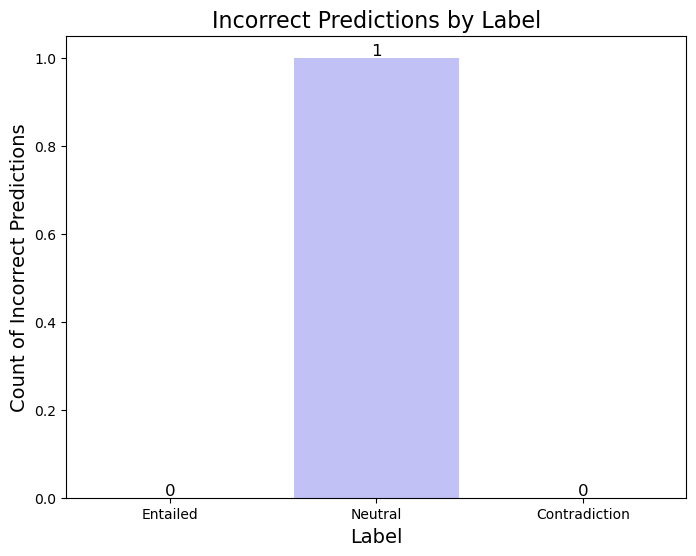

In [26]:
label_mapping = {0: "Entailed", 1: "Neutral", 2: "Contradiction"}

original_30['label_name'] = original_30['label'].map(label_mapping)

all_labels = ["Entailed", "Neutral", "Contradiction"]
label_counts = original_30['label_name'].value_counts().reindex(all_labels, fill_value=0)

# color palette for the labels
colors = ["#efc7c2", "#b8b8ff", "#8fc0a9"] 

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)

plt.title("Incorrect Predictions by Label", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count of Incorrect Predictions", fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

Showcasing what the label was mispredicted as.

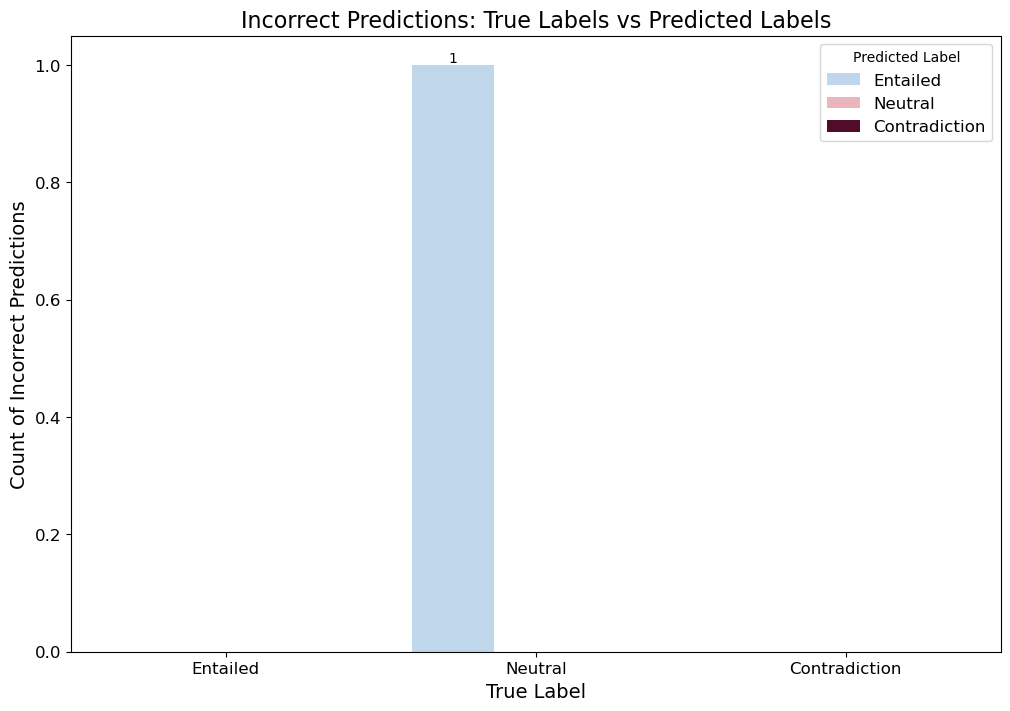

In [27]:
label_mapping = {0: "Entailed", 1: "Neutral", 2: "Contradiction"}
original_30['label_name'] = original_30['label'].map(label_mapping)
original_30['predicted_label_name'] = original_30['predicted_label'].map(label_mapping)

incorrect_counts = (
    original_30[original_30['label'] != original_30['predicted_label']]
    .groupby(['label_name', 'predicted_label_name'])
    .size()
    .reset_index(name='count')
)

# Ensure all combinations of true and predicted labels are represented (fill missing ones with 0)
all_combinations = pd.MultiIndex.from_product(
    [label_mapping.values(), label_mapping.values()], 
    names=["label_name", "predicted_label_name"]
)
incorrect_counts = incorrect_counts.set_index(['label_name', 'predicted_label_name']).reindex(all_combinations, fill_value=0).reset_index()

color_palette = {
    "Entailed": "#b9d6f2",
    "Neutral": "#F4ACB7",
    "Contradiction": "#5c0029"
}

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    data=incorrect_counts,
    x='label_name',
    y='count',
    hue='predicted_label_name',
    palette=color_palette
)

# Add numbers on top of the bars
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height > 0
        bar_plot.annotate(
            f'{int(height)}', 
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom', fontsize=10, color='black'
        )

plt.title("Incorrect Predictions: True Labels vs Predicted Labels", fontsize=16)
plt.xlabel("True Label", fontsize=14)
plt.ylabel("Count of Incorrect Predictions", fontsize=14)
plt.legend(title="Predicted Label", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Original 300 From SNLI Examples

In [28]:
file_path = "eval_org_300/eval_predictions.jsonl"
original_300 = filter_incorrect_predictions(file_path)
original_300.head()

Filtered DataFrame contains 31 incorrect predictions.


,premise,hypothesis,label,predicted_scores,predicted_label
0,A Little League team tries to catch a runner s...,A team is trying to tag a runner out.,0,"[-0.6187552809715271, 0.09708131849765778, 0.4...",2
1,"A man, woman, and child enjoying themselves on...",A family of three is at the beach.,0,"[0.4765802323818207, 1.4416227340698242, -2.31...",1
2,A man and a woman cross the street in front of...,The couple are walking across the street toget...,1,"[1.8070399761199951, 0.6364423036575317, -2.85...",0
3,Woman in white in foreground and a man slightl...,A man is advertising for a restaurant.,0,"[0.9212853908538818, 0.9510861039161682, -2.18...",1
4,Woman in white in foreground and a man slightl...,A woman ordering pizza.,1,"[1.6371761560440063, -0.5855481028556824, -1.1...",0


Graph for incorrect predictions for Original 300

/var/folders/bp/0238tq9n05l4xktxmx50hvfr0000gn/T/ipykernel_15609/3836793576.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)


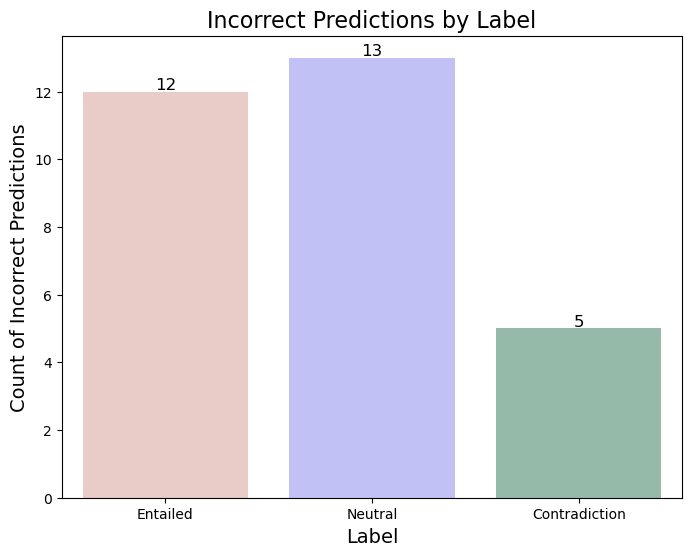

In [29]:
label_mapping = {0: "Entailed", 1: "Neutral", 2: "Contradiction"}

original_300['label_name'] = original_300['label'].map(label_mapping)

all_labels = ["Entailed", "Neutral", "Contradiction"]
label_counts = original_300['label_name'].value_counts().reindex(all_labels, fill_value=0)

# color palette for the labels
colors = ["#efc7c2", "#b8b8ff", "#8fc0a9"] 

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)

plt.title("Incorrect Predictions by Label", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count of Incorrect Predictions", fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

Showcaseing the labels and their miss predictions. 

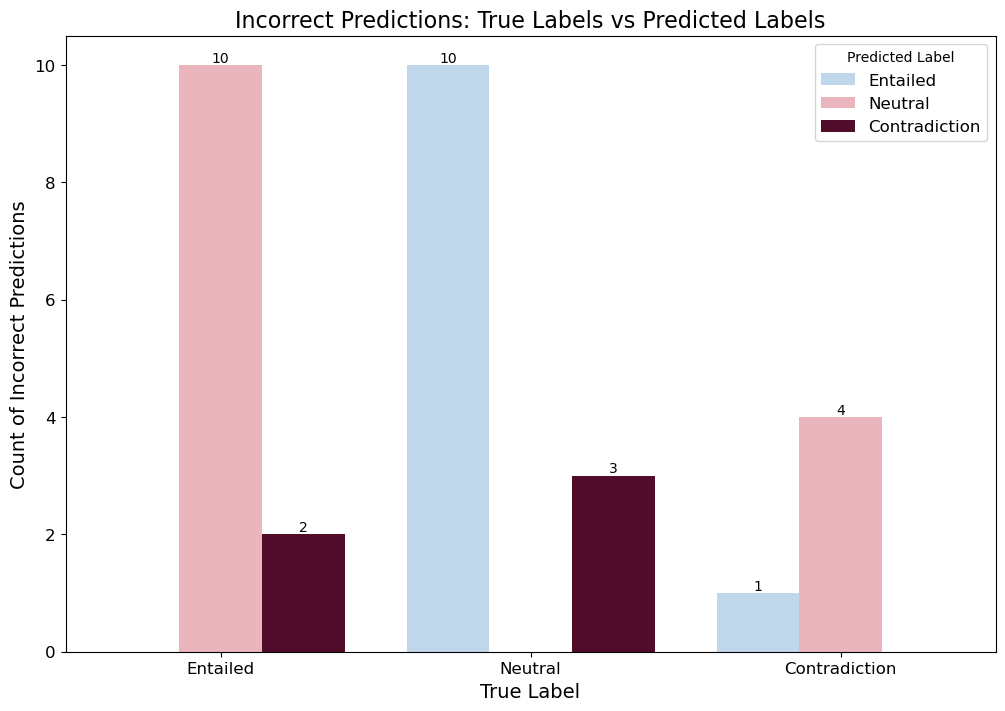

In [30]:
label_mapping = {0: "Entailed", 1: "Neutral", 2: "Contradiction"}
original_300['label_name'] = original_300['label'].map(label_mapping)
original_300['predicted_label_name'] = original_300['predicted_label'].map(label_mapping)

incorrect_counts = (
    original_300[original_300['label'] != original_300['predicted_label']]
    .groupby(['label_name', 'predicted_label_name'])
    .size()
    .reset_index(name='count')
)

# Ensure all combinations of true and predicted labels are represented (fill missing ones with 0)
all_combinations = pd.MultiIndex.from_product(
    [label_mapping.values(), label_mapping.values()], 
    names=["label_name", "predicted_label_name"]
)
incorrect_counts = incorrect_counts.set_index(['label_name', 'predicted_label_name']).reindex(all_combinations, fill_value=0).reset_index()

color_palette = {
    "Entailed": "#b9d6f2",
    "Neutral": "#F4ACB7",
    "Contradiction": "#5c0029"
}

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    data=incorrect_counts,
    x='label_name',
    y='count',
    hue='predicted_label_name',
    palette=color_palette
)

# Add numbers on top of the bars
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height > 0
        bar_plot.annotate(
            f'{int(height)}', 
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom', fontsize=10, color='black'
        )

plt.title("Incorrect Predictions: True Labels vs Predicted Labels", fontsize=16)
plt.xlabel("True Label", fontsize=14)
plt.ylabel("Count of Incorrect Predictions", fontsize=14)
plt.legend(title="Predicted Label", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## Analyze Feature Overlap or Ambiguity for Original 300

Sentence Length Analysis:


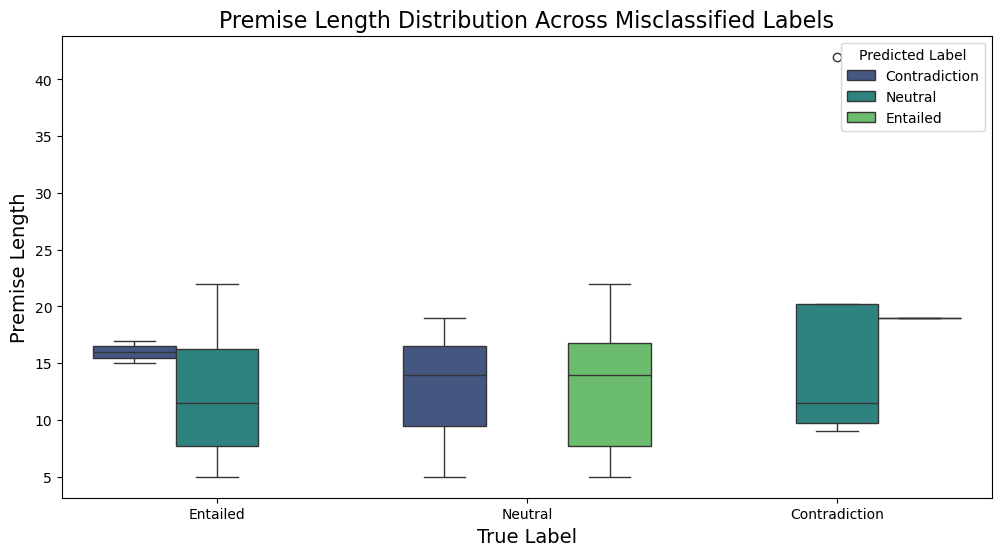

In [31]:
# Calculate sentence lengths
original_300['premise_len'] = original_300['premise'].str.split().apply(len)
original_300['hypothesis_len'] = original_300['hypothesis'].str.split().apply(len)

# Boxplot of sentence lengths
plt.figure(figsize=(12, 6))
sns.boxplot(data=original_300, x='label_name', y='premise_len', hue='predicted_label_name', palette="viridis")
plt.title("Premise Length Distribution Across Misclassified Labels", fontsize=16)
plt.xlabel("True Label", fontsize=14)
plt.ylabel("Premise Length", fontsize=14)
plt.legend(title="Predicted Label")
plt.show()


Original 300 set, Word Cloud for Entailed as Neutral Mispredictions

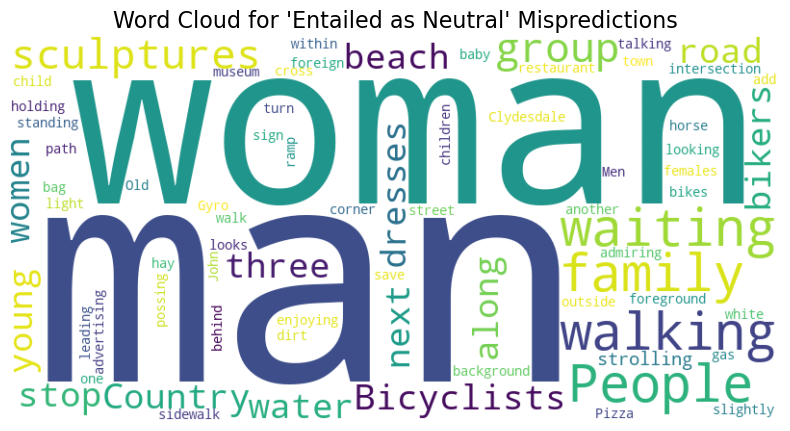

In [32]:
from wordcloud import WordCloud

# Filter for a specific misprediction
entailed_as_neutral = original_300[
    (original_300['label_name'] == "Entailed") & (original_300['predicted_label_name'] == "Neutral")
]
# Combine all premises and hypotheses for word cloud
text_data = " ".join(entailed_as_neutral['premise']) + " " + " ".join(entailed_as_neutral['hypothesis'])

# Generate and plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for 'Entailed as Neutral' Mispredictions", fontsize=16)
plt.show()

Heatmap

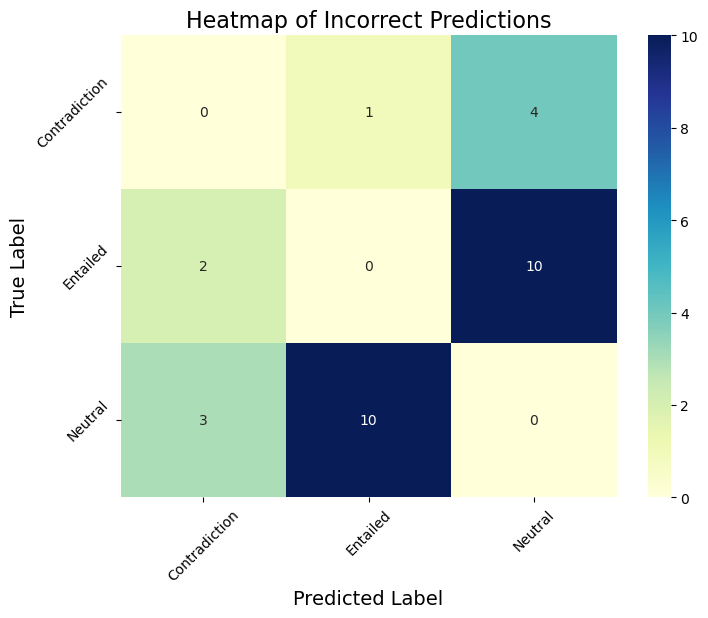

In [33]:
# Create confusion matrix-like data
confusion_data = incorrect_counts.pivot(
    index='label_name', columns='predicted_label_name', values='count'
).fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_data, annot=True, fmt='d', cmap="YlGnBu", cbar=True)

plt.title("Heatmap of Incorrect Predictions", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Analysis for Adversial (30 examples)

In [34]:
file_path = "eval_adversial/eval_predictions.jsonl"
adv_30 = filter_incorrect_predictions(file_path)
adv_30.head()

Filtered DataFrame contains 11 incorrect predictions.


,premise,hypothesis,label,predicted_scores,predicted_label
0,A group of people are jogging in the park unde...,People in the park are walking and chatting.,1,"[-4.229047775268555, -1.8370412588119507, 4.92...",2
1,A woman in a red dress is holding a microphone...,A woman in red is speaking to an audience.,0,"[-0.6368116140365601, 2.226484775543213, -2.13...",1
2,A woman in a red dress is holding a microphone...,"Someone is performing on stage, holding a micr...",1,"[2.7347359657287598, 0.6027947068214417, -3.87...",0
3,Two children are building a sandcastle on the ...,Kids are sitting quietly under a beach umbrella.,1,"[-4.566071033477783, -1.3379650115966797, 4.74...",2
4,A man is riding a bicycle down a busy street.,A man cycles through a bustling city.,0,"[0.325182169675827, 2.1958770751953125, -3.186...",1


Graph for Adversial 30

/var/folders/bp/0238tq9n05l4xktxmx50hvfr0000gn/T/ipykernel_15609/1911958371.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)


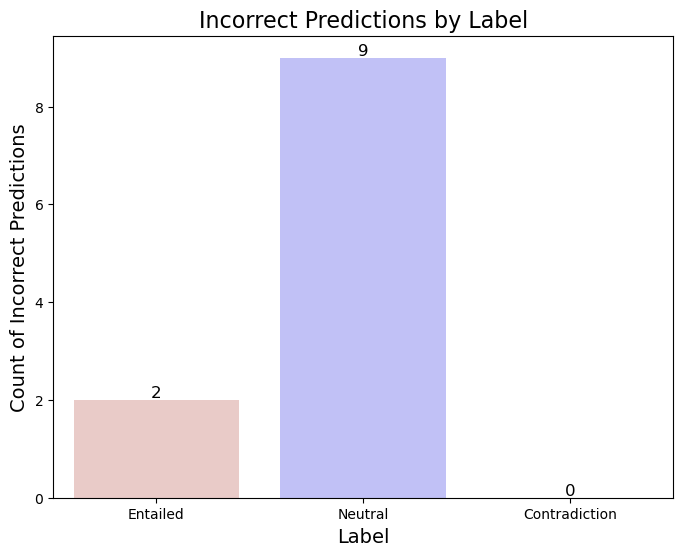

In [35]:
label_mapping = {0: "Entailed", 1: "Neutral", 2: "Contradiction"}

adv_30['label_name'] = adv_30['label'].map(label_mapping)

all_labels = ["Entailed", "Neutral", "Contradiction"]
label_counts = adv_30['label_name'].value_counts().reindex(all_labels, fill_value=0)

# color palette for the labels
colors = ["#efc7c2", "#b8b8ff", "#8fc0a9"] 

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)

plt.title("Incorrect Predictions by Label", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count of Incorrect Predictions", fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

Showing the miss predictions for each label. 

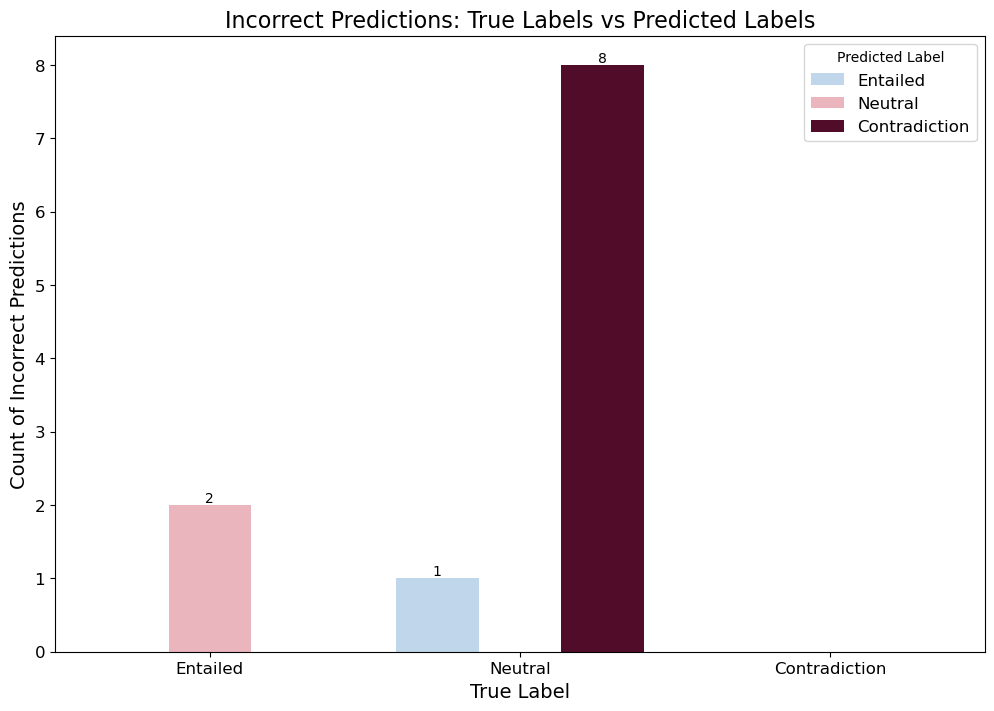

In [36]:
label_mapping = {0: "Entailed", 1: "Neutral", 2: "Contradiction"}
adv_30['label_name'] = adv_30['label'].map(label_mapping)
adv_30['predicted_label_name'] = adv_30['predicted_label'].map(label_mapping)

incorrect_counts = (
    adv_30[adv_30['label'] != adv_30['predicted_label']]
    .groupby(['label_name', 'predicted_label_name'])
    .size()
    .reset_index(name='count')
)

# Ensure all combinations of true and predicted labels are represented 
all_combinations = pd.MultiIndex.from_product(
    [label_mapping.values(), label_mapping.values()], 
    names=["label_name", "predicted_label_name"]
)
incorrect_counts = incorrect_counts.set_index(['label_name', 'predicted_label_name']).reindex(all_combinations, fill_value=0).reset_index()

color_palette = {
    "Entailed": "#b9d6f2",
    "Neutral": "#F4ACB7",
    "Contradiction": "#5c0029"
}

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    data=incorrect_counts,
    x='label_name',
    y='count',
    hue='predicted_label_name',
    palette=color_palette
)

# Add numbers on top of the bars
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:  
        bar_plot.annotate(
            f'{int(height)}', 
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom', fontsize=10, color='black'
        )

plt.title("Incorrect Predictions: True Labels vs Predicted Labels", fontsize=16)
plt.xlabel("True Label", fontsize=14)
plt.ylabel("Count of Incorrect Predictions", fontsize=14)
plt.legend(title="Predicted Label", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Analysis for Adversial (large)

In [37]:
file_path = "eval_adversial_243/eval_predictions.jsonl"
adv_large = filter_incorrect_predictions(file_path)
adv_large.head()

Filtered DataFrame contains 32 incorrect predictions.


,premise,hypothesis,label,predicted_scores,predicted_label
0,A Little League team tries to catch a runner s...,A team is trying to tag a runner out.,0,"[-0.10497284680604935, 0.4141976535320282, -0....",1
1,A man and a woman cross the street in front of...,The couple are walking across the street toget...,1,"[1.6646478176116943, -0.49938681721687317, -1....",0
2,A woman is walking across the street eating a ...,The woman is a seductress.,2,"[-1.925892949104309, 3.6626617908477783, -2.82...",1
3,A skier slides along a metal rail while a crow...,A skier is near the rail looking down.,1,"[2.7854838371276855, -0.3025817573070526, -2.8...",0
4,A skier in electric green on the edge of a ram...,The skier was on the edge of the ramp.,1,"[3.057651996612549, -0.7641124725341797, -2.59...",0


Graphs for Adversial Large

/var/folders/bp/0238tq9n05l4xktxmx50hvfr0000gn/T/ipykernel_15609/301845179.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)


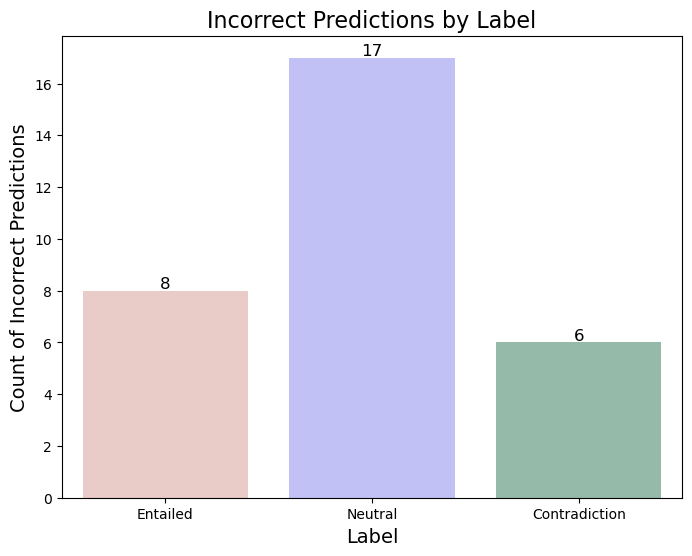

In [38]:
label_mapping = {0: "Entailed", 1: "Neutral", 2: "Contradiction"}

adv_large['label_name'] = adv_large['label'].map(label_mapping)

all_labels = ["Entailed", "Neutral", "Contradiction"]
label_counts = adv_large['label_name'].value_counts().reindex(all_labels, fill_value=0)

# color palette for the labels
colors = ["#efc7c2", "#b8b8ff", "#8fc0a9"] 

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)

plt.title("Incorrect Predictions by Label", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count of Incorrect Predictions", fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

Showcasing the miss predictions for each label.

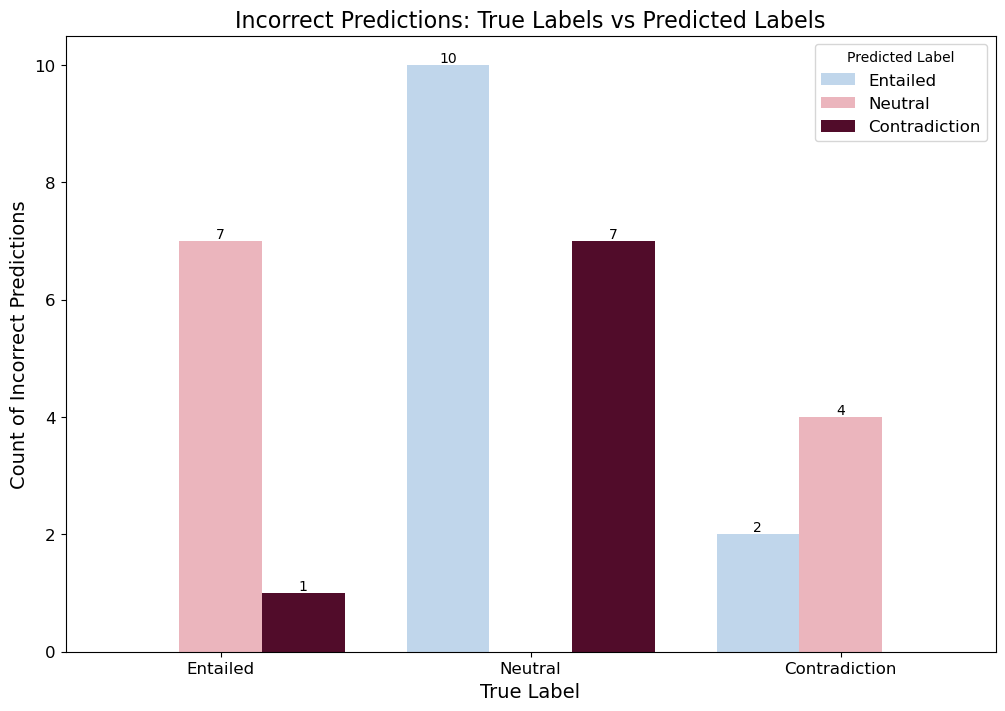

In [39]:
label_mapping = {0: "Entailed", 1: "Neutral", 2: "Contradiction"}
adv_large['label_name'] = adv_large['label'].map(label_mapping)
adv_large['predicted_label_name'] = adv_large['predicted_label'].map(label_mapping)

incorrect_counts = (
    adv_large[adv_large['label'] != adv_large['predicted_label']]
    .groupby(['label_name', 'predicted_label_name'])
    .size()
    .reset_index(name='count')
)

# Ensure all combinations of true and predicted labels are represented
all_combinations = pd.MultiIndex.from_product(
    [label_mapping.values(), label_mapping.values()], 
    names=["label_name", "predicted_label_name"]
)
incorrect_counts = incorrect_counts.set_index(['label_name', 'predicted_label_name']).reindex(all_combinations, fill_value=0).reset_index()

color_palette = {
    "Entailed": "#b9d6f2",
    "Neutral": "#F4ACB7",
    "Contradiction": "#5c0029"
}

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    data=incorrect_counts,
    x='label_name',
    y='count',
    hue='predicted_label_name',
    palette=color_palette
)

# Add numbers on top of the bars
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0: 
        bar_plot.annotate(
            f'{int(height)}', 
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom', fontsize=10, color='black'
        )

plt.title("Incorrect Predictions: True Labels vs Predicted Labels", fontsize=16)
plt.xlabel("True Label", fontsize=14)
plt.ylabel("Count of Incorrect Predictions", fontsize=14)
plt.legend(title="Predicted Label", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Analysis for Contrast Sets (30 examples)

In [40]:
file_path = "eval_contrast/eval_predictions.jsonl"
contrast_df = filter_incorrect_predictions(file_path)
contrast_df.head()

Filtered DataFrame contains 6 incorrect predictions.


,premise,hypothesis,label,predicted_scores,predicted_label
0,A person on a horse jumps over a broken down a...,A person is training his horse for a swimming ...,2,"[-4.481811046600342, 3.042536735534668, 0.5853...",1
1,A person on a horse jumps over a broken down a...,A person is training his horse to jump over ob...,0,"[-0.6955260038375854, 3.0153861045837402, -3.2...",1
2,Children smiling and waving at camera.,The children are waving at the camera while sm...,0,"[-2.7015953063964844, 4.189029216766357, -2.71...",1
3,Two blond women are hugging one another.,Two women are hugging each other in a friendly...,0,"[-0.0024663684889674187, 2.965149402618408, -3...",1
4,Two women who just had lunch hugging and sayin...,Two women are having a conversation after lunch.,1,"[2.9909515380859375, -0.2583397924900055, -3.1...",0


Graph for contrast set errors

/var/folders/bp/0238tq9n05l4xktxmx50hvfr0000gn/T/ipykernel_15609/1236649499.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)


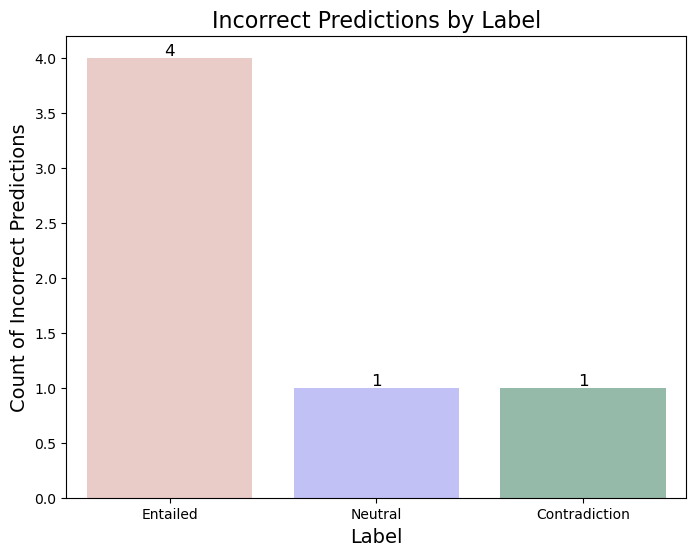

In [41]:
label_mapping = {0: "Entailed", 1: "Neutral", 2: "Contradiction"}

contrast_df['label_name'] = contrast_df['label'].map(label_mapping)

all_labels = ["Entailed", "Neutral", "Contradiction"]
label_counts = contrast_df['label_name'].value_counts().reindex(all_labels, fill_value=0)

# color palette for the labels
colors = ["#efc7c2", "#b8b8ff", "#8fc0a9"] 

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)

plt.title("Incorrect Predictions by Label", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count of Incorrect Predictions", fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

Showcasing the miss predictions for each label.

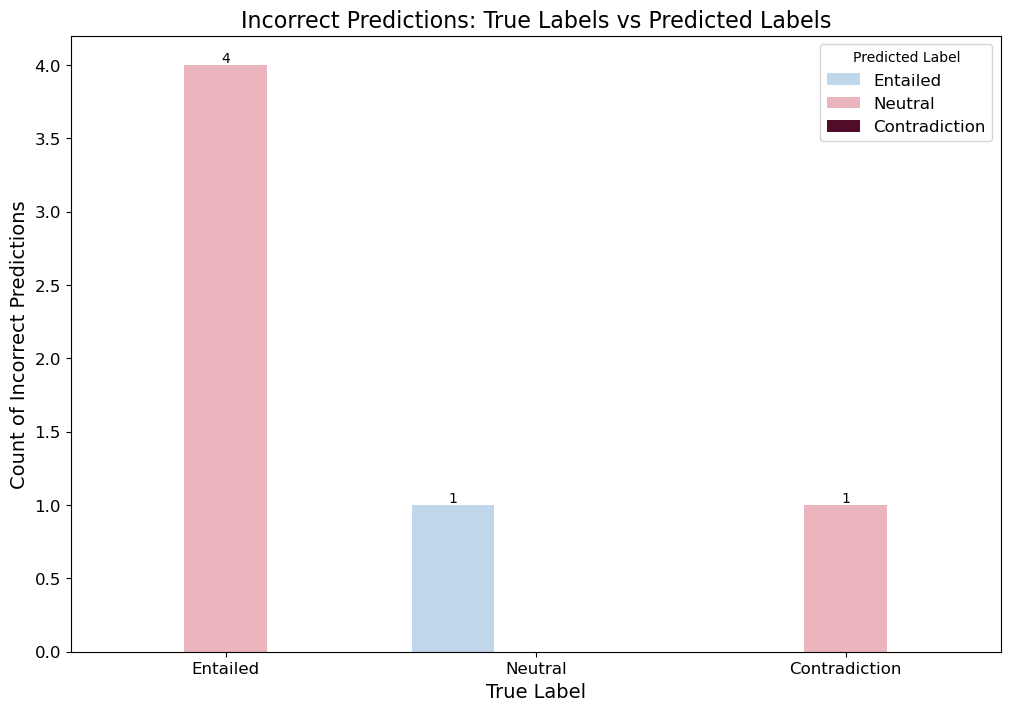

In [42]:
label_mapping = {0: "Entailed", 1: "Neutral", 2: "Contradiction"}
contrast_df['label_name'] = contrast_df['label'].map(label_mapping)
contrast_df['predicted_label_name'] = contrast_df['predicted_label'].map(label_mapping)

incorrect_counts = (
    contrast_df[contrast_df['label'] != contrast_df['predicted_label']]
    .groupby(['label_name', 'predicted_label_name'])
    .size()
    .reset_index(name='count')
)

# Ensure all combinations of true and predicted labels are represented
all_combinations = pd.MultiIndex.from_product(
    [label_mapping.values(), label_mapping.values()], 
    names=["label_name", "predicted_label_name"]
)
incorrect_counts = incorrect_counts.set_index(['label_name', 'predicted_label_name']).reindex(all_combinations, fill_value=0).reset_index()

color_palette = {
    "Entailed": "#b9d6f2",
    "Neutral": "#F4ACB7",
    "Contradiction": "#5c0029"
}

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    data=incorrect_counts,
    x='label_name',
    y='count',
    hue='predicted_label_name',
    palette=color_palette
)

# Add numbers on top of the bars
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:
        bar_plot.annotate(
            f'{int(height)}', 
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom', fontsize=10, color='black'
        )

plt.title("Incorrect Predictions: True Labels vs Predicted Labels", fontsize=16)
plt.xlabel("True Label", fontsize=14)
plt.ylabel("Count of Incorrect Predictions", fontsize=14)
plt.legend(title="Predicted Label", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()